The unit root is a combination of autoregressive coefficients of a series that indicates non-stationarity if it equals an integer value. 

Unit roots in time series apply to all variations of ARIMA models. A unit root in a time series indicates that the stochastic process cannot be stationary. The order of the unit root indicates the differencing required to produce a stationary process, where the unit root is solved by an equation involving a number m and autoregressive coefficients of the series. Equation similar to solving for polynomial roots, and if a solution exists then unit root of order m must be differenced m times to produce stationary series. 

This can be checked by taking unit root and inputting it into expectation and variance formulas for a series, which would result in changing variance and therefore indicate the series is non-stationary.

Tests for stationarity; can use augmented Dickey-Fuller Test which uses a null hypothesis to return a p-value to check whether hypothesis holds or not. The null hypothesis checks whether a unit root exists in the time series. If it does then lagged values cannot be used for predicting future time steps therefore the time-series isn't stationary. If the null hypothesis does not hold (it is false) then the opposite must occur and the time series is stationary.

Manually check test-statistic against Dickey-Fuller T-distribution; however stats packages can do this automatically

In [2]:
import numpy as np
import pandas as pd
passenger_data = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
birth_data = pd.read_csv('/content/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

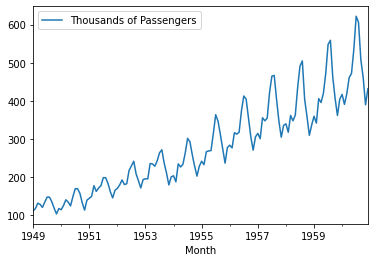

In [3]:
passenger_data.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

Perform ADF and output test statistic, p-value, lags for selected time series and critical values per each confidence interval

In [20]:
def adf_test(series, title=''):
  print(f'ADF: {title}')
  result = adfuller(series.dropna(), autolag='AIC')
  labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
  out = pd.Series(result[0:4], index=labels)

  for key, val in result[4].items():
    out[f'critical value ({key})'] = val
  
  print(out.to_string())

  if result[1] <= 0.05:
    print('Reject null hypothesis since data has no unit root and is stationary')
  else:
    print('Failed to reject the null hypothesis since data has unit root and is non-stationary')

In [10]:
adfuller_passenger = adf_test(passenger_data['Thousands of Passengers'])

ADF: 
ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Failed to reject the null hypothesis since data has unit root and is non-stationary


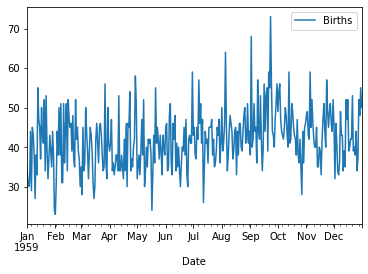

In [12]:
birth_data.plot()

In [21]:
adfuller_births = adf_test(birth_data['Births'])

ADF: 
ADF Test Statistic       -4.808291
p-value                   0.000052
# Lags Used               6.000000
# Observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Reject null hypothesis since data has no unit root and is stationary


Granger-Causality test determines if one time series useful in forecasting another. Difficult to determine if changes in one series are correlated to changes in another series over large time (small correlations between series however are easier to observe). However correlation does not imply causality; better to describe test as whether time series X can be used to forecast time series Y (not necessarily CAUSE changes in time series Y).

Null hypothesis states that no lagged values of series X can be used to predict series Y with significant improvement; proving it wrong means series X can be used to forecast series Y however. 

For each lag, run it through t-test to determine if lags of x can be used to predict y. Then run all combined lags through an f-test to determine if combination of all lags of x can be used to predict y. 

Often time series that work under Granger Causality are those that have a similar form and are shifted version of one another (time lags from series X can be used to forecast Y given series Y is a shifted version of series X)

Granger-Causality can be used in economics to understand how mimicking export patterns of successful geographies can elevate & improve less successful geographies by assuming some relationship exists between both economies.

In [23]:
samples_data = pd.read_csv('/content/samples.csv', index_col=0, parse_dates=True)

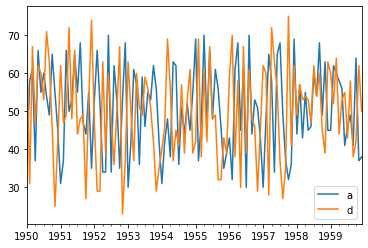

In [24]:
samples_data[['a', 'd']].plot()

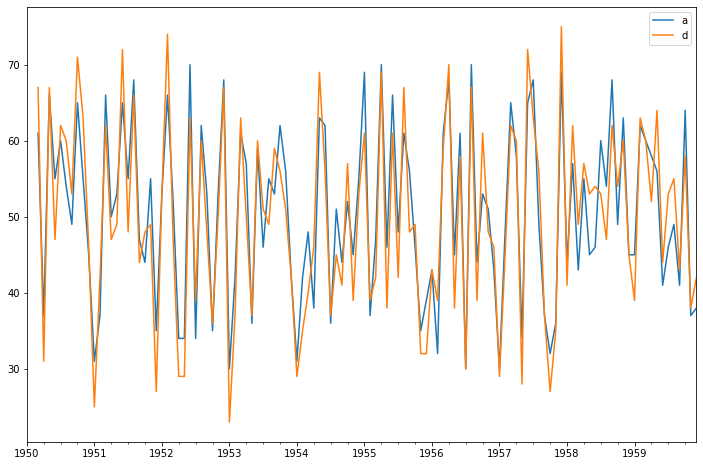

In [25]:
samples_data['a'].iloc[2:].plot(figsize=(12, 8), legend=True)
samples_data['d'].shift(2).plot(legend=True)

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests

Exploring Granger-Causality test, evident use-case shown by shifting datasets for alignment (implying one CAN be used to forecast the other)

In [27]:
grangercausalitytests(samples_data[['a', 'd']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681287, 0.1942027811635669, 116.0, 1.0),
   'ssr_chi2test': (1.7492231682327877, 0.1859744207442444, 1),
   'ssr_ftest': (1.7051251051680956, 0.19420278116357173, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.0339426255596, 6.025362015682193e-45, 113.0, 2.0),
   'ssr_chi2test': (597.3806235365697, 1.9074176679053317e-130, 2),
   'ssr_ftest': (286.03394262556094, 6.025362015680875e-45, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.7446232861632, 3.228848294146134e-43, 110.0, 3.0),
   'ssr_chi2test': (602.2669343040271, 3.2505045874684837e-130, 3),
   'ssr_ftest': (188.74462328616235, 3.2288482941467997e-43, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.

Notice at lags 2 and 3 p-values are very low, indicating null hypothesis does not hold and granger-causality does exist between the datasets

In [28]:
grangercausalitytests(samples_data[['b', 'd']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


{1: ({'lrtest': (1.5517414581132698, 0.21287853854121006, 1),
   'params_ftest': (1.5225271098610054, 0.2197316060388175, 116.0, 1.0),
   'ssr_chi2test': (1.561902810978071, 0.21138682952677978, 1),
   'ssr_ftest': (1.5225271098609767, 0.2197316060388221, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9051081656513134, 0.636001674473408, 2),
   'params_ftest': (0.43504441349139417, 0.6483153418342347, 113.0, 2.0),
   'ssr_chi2test': (0.9085883326015011, 0.6348959407829895, 2),
   'ssr_ftest': (0.4350444134913967, 0.6483153418342347, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.6895254112311022, 0.6392650421085297, 3),
   'params_ftest': (0.5333223212193045, 0.6603817798496421, 110.0, 3.0),
   'ssr_chi2test': (1.7017830431634327, 0.6365374570974305, 3),
   'ssr_ftest': (0.5333223212193094, 0.6603817798496392, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

Notice at all lags p-values are very high indicating granger-causality does not exist

Evaluation metrics used for model selection include: Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). 

AIC evaluates a collection of models and estimates the quality of each model relative to others; penalties are provided for number of parameters to reduce overfitting. 

BIC very similar to AIC however it utilizes a Bayesian approach. 

Generally hypothesis testing can be done using AIC rather than test statistics and p-values given that each test compares two statistical models. AIC is a generalist approach that differs from frequentist and bayesian statistics. 

In [33]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

Show range of values per each month or quarter along with average, upticks in dataset show possible seasonality

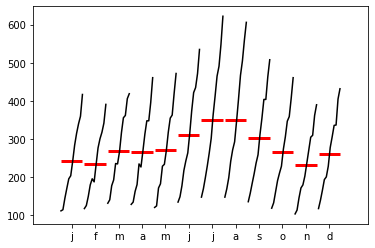

In [34]:
month_plot(passenger_data['Thousands of Passengers']);

In [35]:
passenger_data_quarter = passenger_data['Thousands of Passengers'].resample(rule='Q').mean()

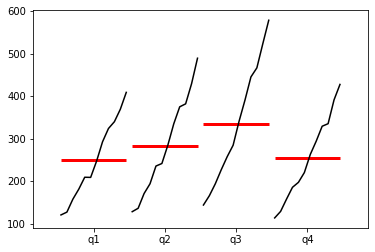

In [37]:
quarter_plot(passenger_data_quarter);